<h1> MIDS - w261 Machine Learning At Scale </h1>
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

<h2>Assignment - HW7</h2>


---
__Name:__  Leslie Teo
__Class:__ MIDS w261 (Section 1, Winter 2018)     
__Email:__  lteo@iSchool.Berkeley.edu; lteo01@berkeley.edu      
__StudentId__  303218617     __End of StudentId__     
__Week:__   

__NOTE:__ please replace `1234567` with your student id above      
__Due Time:__ HW is due the Tuesday of the following week by 8AM (West coast time). I.e., Tuesday, Mar 14, 2017 in the case of this homework. 

# Instructions

MIDS UC Berkeley, Machine Learning at Scale   
DATSCIW261 ASSIGNMENT #7

Version 2017-3-9 


## IMPORTANT

This homework can be completed locally on your computer 

### === INSTRUCTIONS for SUBMISSIONS ===   
Follow the instructions for submissions carefully.

Each student has a `HW-<user>` repository for all assignments.   

Click this link to enable you to create a github repo within the MIDS261 Classroom:   
https://classroom.github.com/assignment-invitations/3b1d6c8e58351209f9dd865537111ff8   
and follow the instructions to create a HW repo.

Push the following to your HW github repo into the master branch:
* Your local HW6 directory. Your repo file structure should look like this:

```
HW-<user>
    --HW3
       |__MIDS-W261-HW-03-<Student_id>.ipynb
       |__MIDS-W261-HW-03-<Student_id>.pdf
       |__some other hw3 file
    --HW4
       |__MIDS-W261-HW-04-<Student_id>.ipynb
       |__MIDS-W261-HW-04-<Student_id>.pdf
       |__some other hw4 file
    etc..
```    

<h1 style="color:#021353;">Dataset Description</h1>

Download the dataset from: https://www.dropbox.com/sh/2c0k5adwz36lkcw/AAAAKsjQfF9uHfv-X9mCqr9wa?dl=0

undirected_toy.txt - Undirected toy network dataset

directed_toy.txt - Directed toy network dataset

synNet/synNet.txt - a sparse representation of the synNet network in indexed form

synNet/indices.txt - the same network in a lookup list of indices and words

wikipedia/all-pages-indexed-out.txt - Graph of Wikipedia

wikipedia/indices.txt - Page titles and page Ids

wikipedia/all-pages-indexed-out.txt - network in indexed format

wikipedia/all-pages-indexed-in.txt - network in indexed format

wikipedia/indices.txt - network in indexed format

<h1 style="color:#021353;">General Description</h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
In this assignment you will explore networks and develop MRJob code for 
finding shortest path graph distances. To build up to large data 
you will develop your code on some very simple, toy networks.
After this you will take your developed code forward and modify it and 
apply it to two larger datasets (performing EDA along the way).

<h3>Undirected toy network dataset</h3>


In an undirected network all links are symmetric, 
i.e., for a pair of nodes 'A' and 'B,' both of the links:

A -> B and B -> A

will exist. 

The toy data are available in a sparse (stripes) representation:

(node) \t (dictionary of links)

on Dropbox - undirected_toy.txt

In the dictionary, target nodes are keys, link weights are values 
(here, all weights are 1, i.e., the network is unweighted).


<h3>Directed toy network dataset</h3>

In a directed network all links are not necessarily symmetric, 
i.e., for a pair of nodes 'A' and 'B,' it is possible for only one of:

A -> B or B -> A

to exist. 

These toy data are available in a sparse (stripes) representation:

(node) \t (dictionary of links)

on Dropbox - directed_toy.txt

In the dictionary, target nodes are keys, link weights are values 
(here, all weights are 1, i.e., the network is unweighted).
</pre>
</div>

<h1 style="color:#021353;">HW 7.0: Shortest path graph distances (toy networks)</h1>

## HW 7.0.1

<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
In this part of your assignment you will develop the base of your code for the week.

Write MRJob classes to find shortest path graph distances, as described in the lectures. In addition to finding the distances, your code should also output a distance-minimizing path between the source and target.
Work locally for this part of the assignment, and use both of the undirected and directed toy networks.

To proof you code's function, run the following jobs

- shortest path in the undirected network from node 1 to node 4
Solution: 1,5,4. NOTE: There is another shortest path also (HINT: 1->5->4)! Either will suffice (you will find this also in the remaining problems. E.g., 7.2 and 7.4.
 

- shortest path in the directed network from node 1 to node 5
Solution: 1,2,4,5

and report your output---make sure it is correct!

In [1]:
%%writefile directed_toy_graph.txt
1	{'2': 1, '6': 1}
2	{'1': 1, '3': 1, '4': 1}
3	{'2': 1, '4': 1}
4	{'2': 1, '5': 1}
5	{'1': 1, '2': 1, '4': 1}

Overwriting directed_toy_graph.txt


In [2]:
%%writefile undirected_toy_graph.txt
1	{'2': 1,'5': 1}
2	{'1': 1,'3': 1,'4': 1,'5': 1}
3	{'2': 1, '4': 1}
4	{'2': 1,'3': 1,'5': 1}
5	{'1': 1, '2': 1, '4': 1}

Overwriting undirected_toy_graph.txt


In [3]:
%%writefile undirected_weighted_toy_graph.txt
1	{"2": 1, "5": 100}
2	{"1": 1, "3": 1, "5": 1, "4": 1}
3	{"2": 1, "4": 1}
4	{"3": 1, "2": 1, "5": 1}
5	{"1": 100, "2": 1, "4": 1, "6":1}
6	{"5": 1, "7": 1}
7	{"6": 1}

Overwriting undirected_weighted_toy_graph.txt


In [4]:
!cat directed_toy_graph.txt
print "\n","-"*100
!cat undirected_toy_graph.txt
print "\n","-"*100
!cat undirected_weighted_toy_graph.txt

1	{'2': 1, '6': 1}
2	{'1': 1, '3': 1, '4': 1}
3	{'2': 1, '4': 1}
4	{'2': 1, '5': 1}
5	{'1': 1, '2': 1, '4': 1}
----------------------------------------------------------------------------------------------------
1	{'2': 1,'5': 1}
2	{'1': 1,'3': 1,'4': 1,'5': 1}
3	{'2': 1, '4': 1}
4	{'2': 1,'3': 1,'5': 1}
5	{'1': 1, '2': 1, '4': 1}
----------------------------------------------------------------------------------------------------
1	{"2": 1, "5": 100}
2	{"1": 1, "3": 1, "5": 1, "4": 1}
3	{"2": 1, "4": 1}
4	{"3": 1, "2": 1, "5": 1}
5	{"1": 100, "2": 1, "4": 1, "6":1}
6	{"5": 1, "7": 1}
7	{"6": 1}

In [5]:
# Set Up
import numpy as np
from __future__ import division
import os

%matplotlib inline
import matplotlib
matplotlib.pyplot.style.use('ggplot')

%reload_ext autoreload
%autoreload 2

In [6]:
%%writefile start_sssp.py
#!/opt/anaconda/bin/python

from mrjob.job import MRJob
from mrjob.step import MRStep
import sys, ast

class MRstart_sssp(MRJob):

    # Set initial node conditions
    def configure_options(self):
        super(MRstart_sssp, self).configure_options()
        self.add_passthrough_option('--startNode', default='1')

    # Process lines
    def mapper(self, _, line):
        fields = line.strip().split('\t')
        name = fields[0]
        neighbors = ast.literal_eval(fields[1])
        if name == self.options.startNode:
            yield name, (neighbors, 0, [name], 'Q')
        else:
            yield name, (neighbors, sys.maxint, [], 'U')

if __name__ == '__main__':
    MRstart_sssp.run()

Overwriting start_sssp.py


In [7]:
!python start_sssp.py -r local ./undirected_toy.out --start 1

No handlers could be found for logger "mrjob.launch"
No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/start_sssp.root.20180321.132039.257617
Running step 1 of 1...
Streaming final output from /tmp/start_sssp.root.20180321.132039.257617/output...
"5"	[{"1":1,"2":1,"4":1},9223372036854775807,[],"U"]
"3"	[{"2":1,"4":1},9223372036854775807,[],"U"]
"1"	[{"2":1,"5":1},0,["1"],"Q"]
"2"	[{"1":1,"3":1,"5":1,"4":1},9223372036854775807,[],"U"]
"4"	[{"3":1,"2":1,"5":1},9223372036854775807,[],"U"]
Removing temp directory /tmp/start_sssp.root.20180321.132039.257617...


In [8]:
%%writefile sssp.py
#!/opt/anaconda/bin/python

from mrjob.job import MRJob
from mrjob.step import MRStep
import sys, ast

class MRsssp(MRJob):
    
    # Process lines
    def mapper(self, _, line):

        # Split text to get our data
        fields = line.strip().split('\t')     
        name = str(ast.literal_eval(fields[0]))
        value = ast.literal_eval(fields[1])
        neighbors = value[0]
        distance = int(value[1])
        path = value[2]
        status = value[3]
        
        # If this node is queued, contine expand
        if status == 'Q':
            yield name, [neighbors, distance, path, 'V']
            if neighbors:
                for node in neighbors:
                    temp_path = list(path)
                    temp_path.append(node)
                    yield node, [None, distance + 1, temp_path, 'Q']
        else:
            yield name, [neighbors, distance, path, status]

    # Cycle through nodes
    def reducer(self, key, values):
        neighbors = {}
        distance = sys.maxint
        status = None
        path = []

        for val in values:
            if val[3] == 'V':
                neighbors = val[0]
                distance = val[1]
                path = val[2]
                status = val[3]
                break
            elif val[0]:
                neighbors = val[0]
                if status != 'Q':
                    status = val[3]
            else:
                path = val[2]
                status = val[3]
                
            # Update minimum distance if necessary
            distance = min(distance, val[1])

        yield key, [neighbors, distance, path, status]

if __name__ == '__main__':
    MRsssp.run()

Overwriting sssp.py


In [9]:
%%writefile sssp_alternative.py
#!/opt/anaconda/bin/python

from mrjob.job import MRJob
from mrjob.step import MRStep
import sys, ast

class MRsssp(MRJob):
    
    def steps(self):
        return [
            MRStep(mapper = self.mapper_1,
            ),
            MRStep(mapper=self.mapper_2,
                   reducer=self.reducer_2,
            )
    ] 
    

    # Set initial node conditions
    def configure_options(self):
        super(MRsssp, self).configure_options()
        self.add_passthrough_option('--startNode', default='1')

    # Process lines
    def mapper_1(self, _, line):
        fields = line.strip().split('\t')
        name = fields[0]
        neighbors = ast.literal_eval(fields[1])
        if name == self.options.startNode:
            yield name, (neighbors, 0, [name], 'Q')
        else:
            yield name, (neighbors, sys.maxint, [], 'U')
            
    # Process lines
    def mapper_2(self, key, values):

        # Split text to get our data  
        name = key
        #values = ast.literal_eval(values)
        neighbors = values[0]
        distance = int(values[1])
        path = values[2]
        status = values[3]
        
        # If this node is queued, contine expand
        if status == 'Q':
            yield name, [neighbors, distance, path, 'V']
            if neighbors:
                for node in neighbors:
                    temp_path = list(path)
                    temp_path.append(node)
                    yield node, [None, distance + 1, temp_path, 'Q']
        else:
            yield name, [neighbors, distance, path, status]

    # Cycle through nodes
    def reducer_2(self, key, values):
        neighbors = {}
        distance = sys.maxint
        status = None
        path = []

        for val in values:
            if val[3] == 'V':
                neighbors = val[0]
                distance = val[1]
                path = val[2]
                status = val[3]
                break
            elif val[0]:
                neighbors = val[0]
                if status != 'Q':
                    status = val[3]
            else:
                path = val[2]
                status = val[3]
                
            # Update minimum distance if necessary
            distance = min(distance, val[1])

        yield key, [neighbors, distance, path, status]

if __name__ == '__main__':
    MRsssp.run()

Writing sssp_alternative.py


In [10]:
#!cp ./undirected_toy_graph.txt ./undirected_toy.out
!python start_sssp.py -r local ./undirected_toy.txt --start 1 > test
!python sssp.py -r local ./test

No handlers could be found for logger "mrjob.launch"
No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/start_sssp.root.20180321.132045.741214
Running step 1 of 1...
Streaming final output from /tmp/start_sssp.root.20180321.132045.741214/output...
Removing temp directory /tmp/start_sssp.root.20180321.132045.741214...
No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/sssp.root.20180321.132046.557916
Running step 1 of 1...
Streaming final output from /tmp/sssp.root.20180321.132046.557916/output...
"5"	[{"1":1,"2":1,"4":1},1,["1","5"],"Q"]
"3"	[{"2":1,"4":1},9223372036854775807,[],"U"]
"1"	[{"2":1,"5":1},0,["1"],"V"]
"2"	[{"1":1,"3":1,"5":1,"4":1},1,["1","2"],"Q"]
"4"	[{"3":1,"2":1,"5":1},9223372036854775807,[],"U"]
Removing temp directory /tmp/sssp.root.20180321.132046.557916...


In [11]:
from start_sssp import MRstart_sssp
from sssp import MRsssp

def findSSP(filename, startNode, finalNode):
    temp_dir = 'w261_temp/' + os.path.dirname(filename)
    !mkdir -p $temp_dir

    filenameState = 'w261_temp/' + filename

    # Initiate graph adjacency list to track state
    mr_job_init = MRstart_sssp(args=[
        filename, '-r', 'local',
        '--cmdenv', 'PATH=/opt/anaconda/bin:$PATH',
        '--startNode', startNode
    ])

    with open(filenameState, 'w') as myfile:
        with mr_job_init.make_runner() as runner:
            runner.run()

            for line in runner.stream_output():
                out = mr_job_init.parse_output_line(line)
                myfile.write(str(out[0]) + '\t' + str(out[1]) + '\n')

    filenameTemp = filenameState + '.tmp'

    mr_job = MRsssp(args=[
        filenameState,
    ])

    for i in range(10):
        with open(filenameTemp, 'w') as myfile:
            with mr_job.make_runner() as runner:
                # Run MRJob
                runner.run()

                # Write stream_output to file
                for line in runner.stream_output():
                    out = mr_job.parse_output_line(line)
                    myfile.write(str(out[0]) + '\t' + str(out[1]) + '\n')

                    if out[0] == finalNode and out[1][3] == 'V':
                        path = out[1][2]
                        return path

        !mv {filenameTemp} {filenameState}

<img src="http://www.candpgeneration.com/images/graphs.png" style="float:left;"/>

In [12]:
# Solution

print 'Shortest path in', 'undirected_toy.txt: '
path = findSSP('undirected_toy.txt', '1', '4')
print path
print "Length: ", len(path)-1

print '\nShortest path in', 'directed_toy.txt: '
path = findSSP('directed_toy.txt', '1', '5')
print path
print "Length: ", len(path)-1

Shortest path in undirected_toy.txt: 


No handlers could be found for logger "mrjob.launch"


[u'1', u'2', u'4']
Length:  2

Shortest path in directed_toy.txt: 
[u'1', u'2', u'4', u'5']
Length:  3


## HW 7.0.2

<h3>Main dataset 1: NLTK synonyms</h3>

In the next part of this assignment you will explore a network derived from the NLTK synonym database used for evaluation in HW 5. At a high level, this network is undirected, defined so that there exists link between two nodes/words if the pair or words are a synonym. These data may be found at the location:

synNet/synNet.txt

synNet/indices.txt

where synNet.txt contains a sparse representation of the network:

(index) \t (dictionary of links)

in indexed form, and indices.txt contains a lookup list

(word) \t (index)

of indices and words. This network is small enough for you to explore and run
scripts locally, but will also be good for a systems test (for later) on AWS.

In the dictionary, target nodes are keys, link weights are values 
(here, all weights are 1, i.e., the network is unweighted).
</pre>
</div>

In [13]:
# NOT APPLICABLE

# START STUDENT CODE 7.0.2

# END STUDENT CODE 7.0.2

<h1 style="color:#021353;">HW 7.1: Exploratory data analysis (NLTK synonyms)</h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Using MRJob, explore the synonyms network data.
Consider plotting the degree distribution (does it follow a power law?),
and determine some of the key features, like:

number of nodes, 
number links,
or the average degree (i.e., the average number of links per node),
etc...

As you develop your code, please be sure to run it locally first (though on the whole dataset). 
Once you have gotten you code to run locally, deploy it on AWS as a systems test
in preparation for our next dataset (which will require AWS).
</pre>
</div>

In [14]:
%%writefile statistics.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import ast

# Count number of nodes and links
class MRcounts(MRJob):
    
    def steps(self):
        return [
            MRStep(mapper = self.mapper,
                   reducer = self.reducer,
            )
        ] 
    
    # Number of links for node
    def mapper(self, _, line):
        node, info = line.strip().split('\t')
        edges = ast.literal_eval(info)
        count = len(edges.items())
        yield None, count
        
    # Sum links
    def reducer(self, _, counts):
        cnts = list(counts)
        yield len(cnts), (sum(cnts), float(sum(cnts))/len(cnts))

if __name__ == '__main__':
    MRcounts.run()

Overwriting statistics.py


In [15]:
%%writefile process_stat.py

import sys, ast

for line in sys.stdin:
    values = line.strip().split()
    print "\nBasic Statistics on Data"
    print "-"*80
    print "Number of nodes: ", values[0]
    print "Number of links: ", ast.literal_eval(values[1])[0]
    print "Average links per node: ", ast.literal_eval(values[1])[1]

Overwriting process_stat.py


In [16]:
!python statistics.py -r local synNet/synNet.txt > stats.out
!python process_stat.py < stats.out

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/statistics.root.20180321.132115.874954
Running step 1 of 1...
Streaming final output from /tmp/statistics.root.20180321.132115.874954/output...
Removing temp directory /tmp/statistics.root.20180321.132115.874954...

Basic Statistics on Data
--------------------------------------------------------------------------------
Number of nodes:  8271
Number of links:  61134
Average links per node:  7.3913674284


In [17]:
%%writefile distribution.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import ast

# Distribution
class MRdistribution(MRJob):

    def steps(self):
        return [
            MRStep(mapper = self.mapper,
                   reducer = self.reducer,
            )
        ] 
    
    def mapper(self, _, line):
        node, info = line.strip().split('\t')
        edges = ast.literal_eval(info)
        count = len(edges.items())
        yield int(count), 1
        
    def reducer(self, count, values):
        yield int(count), sum(values)

if __name__ == '__main__':
    MRdistribution.run()

Overwriting distribution.py


In [18]:
!python distribution.py -r local synNet/synNet.txt | sort -nr -k2,2 > distribution.dat

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/distribution.root.20180321.132122.596979
Running step 1 of 1...
Streaming final output from /tmp/distribution.root.20180321.132122.596979/output...
Removing temp directory /tmp/distribution.root.20180321.132122.596979...


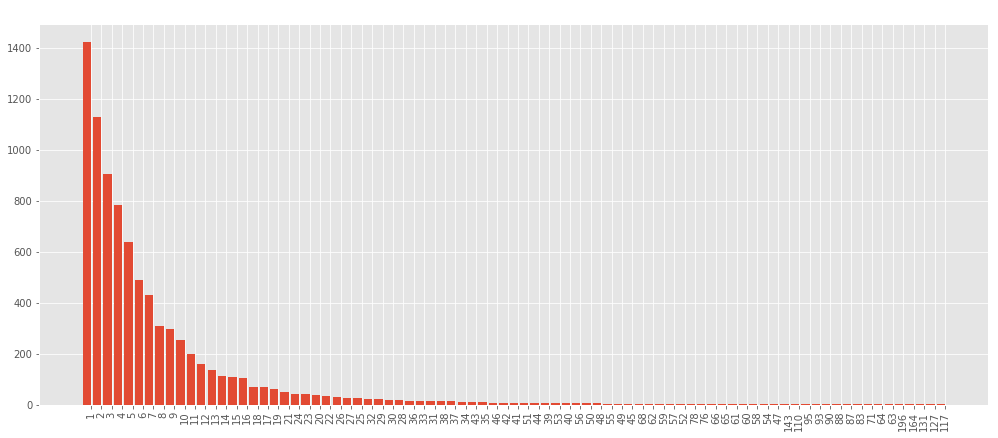

In [19]:
import pylab as pl
    
results = []
for line in open('./distribution.dat').readlines():
    line = line.strip()
    count, freq = line.strip().split("\t")
    results.append([int(count),int(freq)])

items = (np.array(results)[::1].T)
fig = pl.figure(figsize=(17,7))
ax = pl.subplot(111)
width = 0.8
ax.bar(range(len(items[0])), items[1], width=width)
ax.set_xticks(np.arange(len(items[0])) + width/2)
ax.set_xticklabels(items[0], rotation=90)

pl.title("Node Degree Distribution")
pl.show()

<h1 style="color:#021353;">HW 7.2: Shortest path graph distances (NLTK synonyms)</h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Write (reuse your code from 7.0) an MRJob class to find shortest path graph distances, 
and apply it to the NLTK synonyms network dataset. 

Proof your code's function by running the job:

- shortest path starting at "walk" (index=7827) and ending at "make" (index=536),

and showing you code's output. Once again, your output should include the path and the distance.

As you develop your code, please be sure to run it locally first (though on the whole dataset). 
Once you have gotten you code to run locally, deploy it on Altiscale as a systems test
in preparation for our next dataset (which will require Altiscale).

=====================================

wikipedia

wikipedia/all-pages-indexed-out.txt # Graph

wikipedia/indices.txt # Page titles and page Ids

For the remainder of this assignment you will explore the English Wikipedia hyperlink network.

The dataset is built from the Sept. 2015 XML snapshot of English Wikipedia.
For this directed network, a link between articles: 

A -> B

is defined by the existence of a hyperlink in A pointing to B.
This network also exists in the indexed format:

Data: wikipedia/all-pages-indexed-out.txt

Data: wikipedia/all-pages-indexed-in.txt

Data: wikipedia/indices.txt

but has an index with more detailed data:

(article name) \t (index) \t (in degree) \t (out degree)

In the dictionary, target nodes are keys, link weights are values .
Here, a weight indicates the number of time a page links to another.
However, for the sake of this assignment, treat this an unweighted network,
and set all weights to 1 upon data input.

</pre>
</div>

In [20]:
def printPath(indexFile, path):
    path_Dict = {}
    pathSet = set(path)

 
    with open(indexFile, 'r') as myfile:
        for line in myfile:
            fields = line.strip().split('\t')

           
            if fields[1] in pathSet:
                path_Dict[fields[1]] = fields[0]

    print '{:<10s}{:<50s}'.format('INDEX', 'NAME')
    distance = 0
    for node in path:
        distance = distance + 1
        print '{:<10s}{:<50s}'.format(node, path_Dict[node])
    print 'Total Distance is ', '{:,d}'.format(distance - 1)

In [21]:
filename = 'synNet/synNet.txt'
path = findSSP(filename, '7827', '536')
printPath('synNet/indices.txt', path)

INDEX     NAME                                              
7827      walk                                              
4655      passes                                            
2160      clear                                             
536       make                                              
Total Distance is  3


In [22]:
import sys
# print some configuration details for future replicability.
print 'Python Version: %s' % (sys.version.split('|')[0])
hdfs_conf = !hdfs getconf -confKey fs.defaultFS ### UNCOMMENT ON DOCKER
#hdfs_conf = !hdfs getconf -confKey fs.default.name ### UNCOMMENT ON ALTISCALE
print 'HDFS filesystem running at: \n\t %s' % (hdfs_conf[0])

Python Version: 2.7.14 
HDFS filesystem running at: 
	 hdfs://quickstart.cloudera:8020


In [23]:
JAR_FILE = "/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.7.0.jar"
HDFS_DIR = "/user/root/HW7"
HOME_DIR = "/media/notebooks/SP18-1-maynard242"
OUTPUT_DIR = HDFS_DIR + "/OUTPUT"
!hdfs dfs -mkdir {HDFS_DIR}
!hdfs dfs -mkdir {OUTPUT_DIR}


mkdir: `/user/root/HW7': File exists
mkdir: `/user/root/HW7/OUTPUT': File exists


In [24]:
!hdfs dfs -ls {HDFS_DIR}

Found 4 items
drwxr-xr-x   - root supergroup          0 2018-03-20 15:38 /user/root/HW7/OUTPUT
drwxr-xr-x   - root supergroup          0 2018-03-20 15:38 /user/root/HW7/OUTPUTTemp1
drwxr-xr-x   - root supergroup          0 2018-03-20 15:39 /user/root/HW7/OUTPUTTemp2
drwxr-xr-x   - root supergroup          0 2018-03-20 15:40 /user/root/HW7/OUTPUTTemp3


In [52]:
from datetime import datetime
from start_sssp import MRstart_sssp
from sssp import MRsssp

def findSSPHadoop(filename, startNode, endNode):

    outputDirName = 'OUTPUT'
    outputDirState = 'hdfs://%s/%s' % (HDFS_DIR, outputDirName)

    !hdfs dfs -rm -r -f -skipTrash $outputDirState > /dev/null
    
    print datetime.today(), 'Initializing adjacency list'

    # Initiate graph adjacency list to track state
    mr_job_init = MRstart_sssp(args=[
        filename,
        '--startNode', startNode,
        '-r', 'hadoop',
        '--cmdenv', 'PATH=/opt/anaconda/bin:$PATH',
        '--output-dir', outputDirState
    ])

    with mr_job_init.make_runner() as runner:
        runner.run()

    # Iterate over the adjacency list with state until all nodes are visited
    inputDir = outputDirState + '/'
    outputDir = outputDirState + 'Temp1'

    finished = False
    path = None

    i = 1

    while not finished and path is None:
        !hdfs dfs -rm -r -f -skipTrash $outputDir > /dev/null
        print datetime.today(), 'Beginning iteration', i

        mr_job = MRsssp(args=[
            inputDir,
            '-r', 'hadoop',
            '--cmdenv', 'PATH=/opt/anaconda/bin:$PATH',
            '--output-dir', outputDir
        ])

        with mr_job.make_runner() as runner:
            # Run MRJob
            runner.run()

            print datetime.today(), 'Completed iteration', i
            finished = True

            # Write stream_output to file
            for line in runner.stream_output():
                out = mr_job.parse_output_line(line)
                if out[0] == endNode and out[1][3] != 'U':
                    path = out[1][2]
                elif out[1][3] == 'Q':
                    finished = False

        # Update inputDir and outputDir for next iteration
        inputDir = outputDirState + 'Temp' + str(i) + '/'
        outputDir = outputDirState + 'Temp' + str(i + 1)

        i += 1

    return path

In [26]:
# Hadoop

filename = 'synNet/synNet.txt'
startNode = '7827'
finalNode = '536'

path = findSSPHadoop(filename, startNode, finalNode)
printPath('synNet/indices.txt', path)

2018-03-21 13:22:03.906977 Initializing adjacency list
2018-03-21 13:22:30.261934 Beginning iteration 1
2018-03-21 13:22:56.922794 Completed iteration 1
2018-03-21 13:23:03.653482 Beginning iteration 2
2018-03-21 13:23:30.110598 Completed iteration 2
2018-03-21 13:23:36.829185 Beginning iteration 3
2018-03-21 13:24:03.234068 Completed iteration 3
INDEX     NAME                                              
7827      walk                                              
1426      pass                                              
3552      drawings                                          
536       make                                              
Total Distance is  3


<h1 style="color:#021353;">HW 7.3: Exploratory data analysis (Wikipedia)</h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Using MRJob, explore the Wikipedia network data on the AWS cloud. Reuse your code from HW 7.1---does is scale well? 

Be cautioned that Wikipedia is a directed network, where links are not symmetric. 
So, even though a node may be linked to, it will not appear as a primary record itself if it has no out-links. 

This means that you may have to ADJUST your code (depending on its design). 

To be sure of your code's functionality in this context, run a systems test on the directed_toy.txt network.
</pre>
</div>

In [27]:
# Test on directed graph
!python statistics.py -r local directed_toy_graph.txt

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/statistics.root.20180321.132503.884762
Running step 1 of 1...
Streaming final output from /tmp/statistics.root.20180321.132503.884762/output...
5	[12,2.4]
Removing temp directory /tmp/statistics.root.20180321.132503.884762...


In [28]:
!python statistics.py -r local wikipedia/all-pages-indexed-out.txt > stats.out
!python process_stat.py < stats.out

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/statistics.root.20180321.132506.761181
Running step 1 of 1...
Streaming final output from /tmp/statistics.root.20180321.132506.761181/output...
Removing temp directory /tmp/statistics.root.20180321.132506.761181...

Basic Statistics on Data
--------------------------------------------------------------------------------
Number of nodes:  5781290
Number of links:  142114057
Average links per node:  24.5817208616


In [29]:
!python distribution.py -r local wikipedia/all-pages-indexed-out.txt | sort -nr -k2,2 > distribution.dat

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/distribution.root.20180321.132624.323236
Running step 1 of 1...
Streaming final output from /tmp/distribution.root.20180321.132624.323236/output...
Removing temp directory /tmp/distribution.root.20180321.132624.323236...


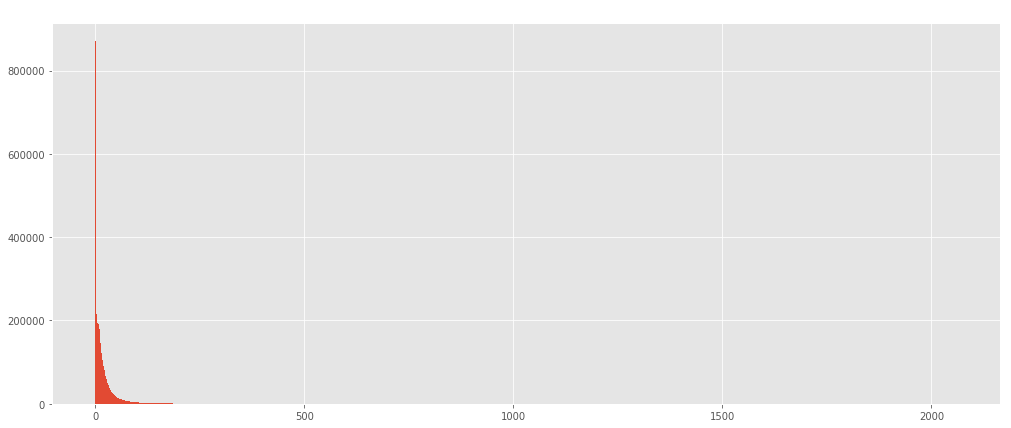

In [30]:
import pylab as pl
    
results = []
for line in open('./distribution.dat').readlines():
    line = line.strip()
    count, freq = line.strip().split("\t")
    results.append([int(count),int(freq)])

items = (np.array(results)[::1].T)
fig = pl.figure(figsize=(17,7))
ax = pl.subplot(111)
width = 2
ax.bar(range(len(items[0])), items[1], width=width)

pl.title("Node Degree Distribution")
pl.show()

<h1 style="color:#021353;">HW 7.4: Shortest path graph distances (Wikipedia)</h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Using MRJob, find shortest path graph distances in the Wikipedia network on the AWS cloud.
Reuse your code from 7.2, but once again be warned of Wikipedia being a directed network.
To be sure of your code's functionality in this context, run a systems test on the directed_toy.txt network.

When running your code on the Wikipedia network, proof its function by running the job:

- shortest path from "Ireland" (index=6176135) to "University of California, Berkeley" (index=13466359),

and show your code's output. Show the shortest path in terms of just page IDS but also in terms of the name of page (show of your MapReduce join skills!!)

Once your code is running, find some other shortest paths and report your results.
</pre>
</div>

In [47]:
# Testing

filename = 'directed_toy_graph.txt'
path = findSSPHadoop(filename, '1', '5')
print path

2018-03-19 13:44:03.450808 Initializing adjacency list
2018-03-19 13:44:28.972794 Beginning iteration 1
2018-03-19 13:44:55.588703 Completed iteration 1
2018-03-19 13:45:02.337259 Beginning iteration 2
2018-03-19 13:45:27.873886 Completed iteration 2
2018-03-19 13:45:34.573958 Beginning iteration 3
2018-03-19 13:46:01.054213 Completed iteration 3
[u'1', u'2', u'4', u'5']


In [48]:
# Hadoop

filename = 'wikipedia/all-pages-indexed-out.txt'
startNode = '6176135'
finalNode = '13466359'

path = findSSPHadoop(filename, startNode, finalNode)
printPath('wikipedia/indices.txt', path)

2018-03-19 13:46:07.759964 Initializing adjacency list
2018-03-19 13:48:21.565157 Beginning iteration 1
2018-03-19 13:52:06.861007 Completed iteration 1
2018-03-19 13:52:53.361049 Beginning iteration 2
2018-03-19 13:56:46.808067 Completed iteration 2
INDEX     NAME                                              
6176135   Ireland                                           
11607791  Seamus Heaney                                     
13466359  University of California, Berkeley                
Total Distance is  2


In [49]:
# Hadoop - Example 1

filename = 'wikipedia/all-pages-indexed-out.txt'
startNode = '23910'
finalNode = '14495387'

path = findSSPHadoop(filename, startNode, finalNode)
printPath('wikipedia/indices.txt', path)

2018-03-19 13:57:41.199967 Initializing adjacency list
2018-03-19 13:59:53.591140 Beginning iteration 1
2018-03-19 14:03:36.339457 Completed iteration 1
2018-03-19 14:04:23.641929 Beginning iteration 2
2018-03-19 14:08:16.405413 Completed iteration 2
2018-03-19 14:09:03.646850 Beginning iteration 3
2018-03-19 14:12:59.264133 Completed iteration 3
INDEX     NAME                                              
23910     100 Federal Street                                
13455888  United States                                     
13739204  Vostok 1                                          
14495387  apsis                                             
Total Distance is  3


In [19]:
# Hadoop - Example 2

filename = 'wikipedia/all-pages-indexed-out.txt'
startNode = '131358'
finalNode = '10798821'

path = findSSPHadoop(filename, startNode, finalNode)
printPath('wikipedia/indices.txt', path)

2018-03-20 14:11:55.155871 Initializing adjacency list


No handlers could be found for logger "mrjob.launch"


2018-03-20 14:14:07.476182 Beginning iteration 1
2018-03-20 14:17:50.966179 Completed iteration 1
INDEX     NAME                                              
131358    1969 Chicago Cubs season                          
10798821  Randy Bobb                                        
Total Distance is  1


<h1 style="color:#021353;">HW 7.5: Conceptual exercise: Largest single-source network distances</h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Suppose you wanted to find the largest network distance from a single source,
i.e., a node that is the furthest (but still reachable) from a single source.

How would you implement this task? 
How is this different from finding the shortest path graph distances?

Is this task more difficult to implement than the shortest path distance?

As you respond, please comment on program structure, runtimes, iterations, general system requirements, etc...
</pre>
</div>

**First, we have to define what we mean by the largest network distance e.g. we could traverse nodes multiple times.** One definition builds on our exercise so far. For each node, we calculate all shortest paths, then find the longest of these paths. This is the longest path from our source. Using this defintion:

**1) Calculate shortest paths for each node from our source**. In comparison to shortest path problem we have to do this for all possible destination nodes. This will require X additional runs, where X is the number of possible final nodes. However, for each node the SSP algorithm works even though we have to make X $\times$ SSP algo calculations.
**2) Compare shortest paths**. Once we have all the shortest paths, we compare the paths and pick the max value. This is the longest path from our source.

In [41]:
#  Not sure if we are supposed to code but here is an example

def findlargest(filename, source, total):
    max_distance = 0
    max_path = None
    for i in range(1, total + 1):
        path = findSSP(filename, source, str(i))
        if (len(path) - 1) > max_distance:
            max_distance = len(path) - 1
            max_path = path
    
    return max_distance, max_path
    
# Toy data model to try
filename = 'undirected_toy.txt' 
source = '1'
total = 5

print(findlargest(filename, source, total))

(2, [u'1', u'2', u'3'])


In [ ]:
# END STUDENT CODE 7.5

<h1 style="color:#021353;">HW 7.5.1: </h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Can we utilize combiners in the HW 7 to perform the shortest path implementation?
Does order inversion help with the HW 7 shortest path implementation?
</pre>
</div>

**Yes we can use combiners.** Combiners will do no harm, but could be run by hadoop to imrpove the workload.

**Order inversion can help if we want to sort intermediate results**. We can minimize computation/processing by using order inversion  to retain only the shortest distances. Note, however, that my solution above does not use order inversion. 

In [ ]:
# With combiners

In [42]:
%%writefile sssp_comb.py
#!/opt/anaconda/bin/python

from mrjob.job import MRJob
from mrjob.step import MRStep
import sys, ast

class MRsssp(MRJob):
    
    def steps(self):
        return [
            MRStep(mapper = self.mapper,
                   combiner = self.combiner,
                   reducer = self.reducer,
            ),
    ] 
    
    
    # Process lines
    def mapper(self, _, line):

        fields = line.strip().split('\t')     
        name = str(ast.literal_eval(fields[0]))
        value = ast.literal_eval(fields[1])
        neighbors = value[0]
        distance = int(value[1])
        path = value[2]
        status = value[3]
        
        # If this node is queued, contine expand
        if status == 'Q':
            yield name, [neighbors, distance, path, 'V']
            if neighbors:
                for node in neighbors:
                    temp_path = list(path)
                    temp_path.append(node)
                    yield node, [None, distance + 1, temp_path, 'Q']
        else:
            yield name, [neighbors, distance, path, status]
            
    def combiner(self, key, values):
        neighbors = {}
        distance = sys.maxint
        status = None
        path = []

        for val in values:
            if val[3] == 'V':
                neighbors = val[0]
                distance = val[1]
                path = val[2]
                status = val[3]
                break
            elif val[0]:
                neighbors = val[0]
                if status != 'Q':
                    status = val[3]
            else:
                path = val[2]
                status = val[3]
                
            distance = min(distance, val[1])
            
        yield key, [neighbors, distance, path, status]
        
    # Cycle through nodes
    def reducer(self, key, values):
        neighbors = {}
        distance = sys.maxint
        status = None
        path = []

        for val in values:
            if val[3] == 'V':
                neighbors = val[0]
                distance = val[1]
                path = val[2]
                status = val[3]
                break
            elif val[0]:
                neighbors = val[0]
                if status != 'Q':
                    status = val[3]
            else:
                path = val[2]
                status = val[3]
                
            # Update minimum distance if necessary
            distance = min(distance, val[1])

        yield key, [neighbors, distance, path, status]

if __name__ == '__main__':
    MRsssp.run()

Overwriting sssp_comb.py


In [43]:
!python start_sssp.py -r local ./undirected_toy.txt --start 1 > test
!python sssp_comb.py -r local ./test

No handlers could be found for logger "mrjob.launch"
No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/start_sssp.root.20180321.142129.581519
Running step 1 of 1...
Streaming final output from /tmp/start_sssp.root.20180321.142129.581519/output...
Removing temp directory /tmp/start_sssp.root.20180321.142129.581519...
No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/sssp_comb.root.20180321.142130.403816
Running step 1 of 1...
Streaming final output from /tmp/sssp_comb.root.20180321.142130.403816/output...
"5"	[{"1":1,"2":1,"4":1},1,["1","5"],"Q"]
"3"	[{"2":1,"4":1},9223372036854775807,[],"U"]
"1"	[{"2":1,"5":1},0,["1"],"V"]
"2"	[{"1":1,"3":1,"5":1,"4":1},1,["1","2"],"Q"]
"4"	[{"3":1,"2":1,"5":1},9223372036854775807,[],"U"]
Removing temp directory /tmp/sssp_comb.root.20180321.142130.403816...


In [44]:
from datetime import datetime
from start_sssp import MRstart_sssp
from sssp_comb import MRsssp

def findSSPHadoop_C(filename, startNode, endNode):

    outputDirName = 'OUTPUT'
    outputDirState = 'hdfs://%s/%s' % (HDFS_DIR, outputDirName)

    !hdfs dfs -rm -r -f -skipTrash $outputDirState > /dev/null
    
    print datetime.today(), 'Initializing adjacency list'

    # Initiate graph adjacency list to track state
    mr_job_init = MRstart_sssp(args=[
        filename,
        '--startNode', startNode,
        '-r', 'hadoop',
        '--cmdenv', 'PATH=/opt/anaconda/bin:$PATH',
        '--output-dir', outputDirState
    ])

    with mr_job_init.make_runner() as runner:
        runner.run()

    # Iterate over the adjacency list with state until all nodes are visited
    inputDir = outputDirState + '/'
    outputDir = outputDirState + 'Temp1'

    finished = False
    path = None

    i = 1

    while not finished and path is None:
        !hdfs dfs -rm -r -f -skipTrash $outputDir > /dev/null
        print datetime.today(), 'Beginning iteration', i

        mr_job = MRsssp(args=[
            inputDir,
            '-r', 'hadoop',
            '--cmdenv', 'PATH=/opt/anaconda/bin:$PATH',
            '--output-dir', outputDir
        ])

        with mr_job.make_runner() as runner:
            # Run MRJob
            runner.run()

            print datetime.today(), 'Completed iteration', i
            finished = True

            # Write stream_output to file
            for line in runner.stream_output():
                out = mr_job.parse_output_line(line)
                if out[0] == endNode and out[1][3] != 'U':
                    path = out[1][2]
                elif out[1][3] == 'Q':
                    finished = False

        # Update inputDir and outputDir for next iteration
        inputDir = outputDirState + 'Temp' + str(i) + '/'
        outputDir = outputDirState + 'Temp' + str(i + 1)

        i += 1

    return path

In [54]:
# Find farthest distance with no combiner

def findlargestHadoop(filename, source, total):
    max_distance = 0
    max_path = None
    print max_distance, max_path, total
    for i in range(1, total + 1):
        path = findSSPHadoop(filename, source, str(i))
        print path
        if (len(path) - 1) > max_distance:
            max_distance = len(path) - 1
            max_path = path
    
    return max_distance, max_path
    
# Toy data model to try
filename = 'undirected_toy.txt' 
source = '1'
total = 5

print(findlargestHadoop(filename, source, total))

0 None 5
2018-03-21 14:55:18.022893 Initializing adjacency list
2018-03-21 14:55:43.974592 Beginning iteration 1
2018-03-21 14:56:10.398302 Completed iteration 1
[u'1']
2018-03-21 14:56:17.097705 Initializing adjacency list
2018-03-21 14:56:43.144781 Beginning iteration 1
2018-03-21 14:57:09.547713 Completed iteration 1
[u'1', u'2']
2018-03-21 14:57:16.278817 Initializing adjacency list
2018-03-21 14:57:42.320138 Beginning iteration 1
2018-03-21 14:58:07.789873 Completed iteration 1
2018-03-21 14:58:14.464588 Beginning iteration 2
2018-03-21 14:58:39.974643 Completed iteration 2
[u'1', u'2', u'3']
2018-03-21 14:58:46.727797 Initializing adjacency list
2018-03-21 14:59:11.842093 Beginning iteration 1
2018-03-21 14:59:38.201635 Completed iteration 1
2018-03-21 14:59:44.953069 Beginning iteration 2
2018-03-21 15:00:10.591460 Completed iteration 2
[u'1', u'5', u'4']
2018-03-21 15:00:17.326829 Initializing adjacency list
2018-03-21 15:00:42.339827 Beginning iteration 1
2018-03-21 15:01:08.7

In [55]:
# Find farthest distance with  combiner

def findlargestHadoop_C(filename, source, total):
    max_distance = 0
    max_path = None
    for i in range(1, total + 1):
        path = findSSPHadoop_C(filename, source, str(i))
        print path
        if (len(path) - 1) > max_distance:
            max_distance = len(path) - 1
            max_path = path
    
    return max_distance, max_path
    
# Toy data model to try
filename = 'undirected_toy.txt' 
source = '1'
total = 5

print(findlargestHadoop_C(filename, source, total))

2018-03-21 15:02:26.779298 Initializing adjacency list
2018-03-21 15:02:53.113917 Beginning iteration 1
2018-03-21 15:03:18.562620 Completed iteration 1
[u'1']
2018-03-21 15:03:25.338084 Initializing adjacency list
2018-03-21 15:03:50.354690 Beginning iteration 1
2018-03-21 15:04:15.675769 Completed iteration 1
[u'1', u'2']
2018-03-21 15:04:22.219450 Initializing adjacency list
2018-03-21 15:04:48.319130 Beginning iteration 1
2018-03-21 15:05:13.764557 Completed iteration 1
2018-03-21 15:05:20.411167 Beginning iteration 2
2018-03-21 15:05:46.940873 Completed iteration 2
[u'1', u'2', u'3']
2018-03-21 15:05:53.610742 Initializing adjacency list
2018-03-21 15:06:19.716200 Beginning iteration 1
2018-03-21 15:06:45.249935 Completed iteration 1
2018-03-21 15:06:52.059199 Beginning iteration 2
2018-03-21 15:07:18.644661 Completed iteration 2
[u'1', u'5', u'4']
2018-03-21 15:07:25.471923 Initializing adjacency list
2018-03-21 15:07:51.614557 Beginning iteration 1
2018-03-21 15:08:16.926697 Com

In [48]:
# END STUDENT CODE 7.5.1

<h1 style="color:#021353;">HW 7.5.2: Combiners: OPTIONAL </h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Implement combiners in the context of HW 7.5 and contrast the performance of this implementation versus the implementation with no combiners. 

Please report the cluster configuration and runtimes in tabular format for both experiments and comment on your findings.
</pre>
</div>

In [56]:
# Hadoop with no combiners

filename = 'undirected_toy.txt'
startNode = '1'
finalNode = 5

print(findlargestHadoop(filename, source, total))

0 None 5
2018-03-21 15:08:51.707017 Initializing adjacency list
2018-03-21 15:09:16.856097 Beginning iteration 1
2018-03-21 15:09:43.413166 Completed iteration 1
[u'1']
2018-03-21 15:09:50.140033 Initializing adjacency list
2018-03-21 15:10:16.211610 Beginning iteration 1
2018-03-21 15:10:42.795634 Completed iteration 1
[u'1', u'2']
2018-03-21 15:10:49.519555 Initializing adjacency list
2018-03-21 15:11:14.396635 Beginning iteration 1
2018-03-21 15:11:40.818317 Completed iteration 1
2018-03-21 15:11:47.483748 Beginning iteration 2
2018-03-21 15:12:12.947864 Completed iteration 2
[u'1', u'2', u'3']
2018-03-21 15:12:19.608454 Initializing adjacency list
2018-03-21 15:12:44.617834 Beginning iteration 1
2018-03-21 15:13:10.014668 Completed iteration 1
2018-03-21 15:13:16.725936 Beginning iteration 2
2018-03-21 15:13:43.211741 Completed iteration 2
[u'1', u'5', u'4']
2018-03-21 15:13:49.798604 Initializing adjacency list
2018-03-21 15:14:14.743410 Beginning iteration 1
2018-03-21 15:14:41.1

In [57]:
# Hadoop with combiners

filename = 'undirected_toy.txt'
startNode = '1'
finalNode = 5

print(findlargestHadoop_C(filename, source, total))

2018-03-21 15:14:47.927706 Initializing adjacency list
2018-03-21 15:15:14.129992 Beginning iteration 1
2018-03-21 15:15:39.521741 Completed iteration 1
[u'1']
2018-03-21 15:15:46.304903 Initializing adjacency list
2018-03-21 15:16:12.378289 Beginning iteration 1
2018-03-21 15:16:37.751488 Completed iteration 1
[u'1', u'2']
2018-03-21 15:16:44.452612 Initializing adjacency list
2018-03-21 15:17:09.629624 Beginning iteration 1
2018-03-21 15:17:36.050106 Completed iteration 1
2018-03-21 15:17:42.717746 Beginning iteration 2
2018-03-21 15:18:08.210904 Completed iteration 2
[u'1', u'2', u'3']
2018-03-21 15:18:14.850928 Initializing adjacency list
2018-03-21 15:18:40.974054 Beginning iteration 1
2018-03-21 15:19:07.545158 Completed iteration 1
2018-03-21 15:19:14.278429 Beginning iteration 2
2018-03-21 15:19:39.736322 Completed iteration 2
[u'1', u'5', u'4']
2018-03-21 15:19:46.362717 Initializing adjacency list
2018-03-21 15:20:12.300910 Beginning iteration 1
2018-03-21 15:20:38.473715 Com

**There is little difference in timing**.

<h1 style="color:#021353;">HW 7.6: Computational exercise: Largest single-source network distances: OPTIONAL </h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Using MRJob, write a code to find the largest graph distance and distance-maximizing nodes from a single-source.
Test your code first on the toy networks and synonyms network to proof its function.
</pre>
</div>

In [ ]:
# START STUDENT CODE 7.6
#(insert cells as needed)

# END STUDENT CODE 7.6

<h1 style="color:#021353;">HW 7.7: Bellman–Ford: OPTIONAL </h1>
<div style="margin:10px;border-left:5px solid #eee;">
<pre style="font-family:sans-serif;background-color:transparent">
Using MRJob, implement Bellman–Ford algorithm https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm. Generate a toy graph with negaitve edges and calculate shortest path from some source to some target within your graph.
</pre>
</div>

In [ ]:
# START STUDENT CODE 7.7
#(insert cells as needed)

# END STUDENT CODE 7.7

==================END HW 7==================